In [1]:
## Data Analysis Phase
## MAin aim is to understand more about the data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stat
import pylab
import visuals as vs
import visuals_withoutborder as vswb
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
#from matplotlib.colors import ListedColormap
## Display all the columns of the dataframe
plt.style.use("ggplot")
#plt.style.use("fivethirtyeight")
pd.pandas.set_option('display.max_columns',None)
pd.pandas.set_option('display.max_rows',None)
import warnings
warnings.filterwarnings('ignore')
import ssl
ssl_cert_reqs = ssl.CERT_NONE ##for SSL : CERTIFICATE VERIFY FAILED ISSUE
# # Multiple Output display
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [62]:
#Vaex library used for memory otimization
#pip install --trusted-host pypi.org --trusted-host files.pythonhosted.org vaex

Gkr-Message: 14:55:06.881: couldn't connect to dbus session bus: Failed to connect to socket /run/user/1001/bus: Connection refused
Keyring is skipped due to an exception: org.freedesktop.DBus.Error.NoServer: Failed to connect to socket /run/user/1001/bus: Connection refused
Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 108 kB 5.6 MB/s eta 0:00:01
     |████████████████████████████████| 3.2 MB 11.0 MB/s eta 0:00:01
     |████████████████████████████████| 42 kB 673 kB/s  eta 0:00:01
     |████████████████████████████████| 25.5 MB 11.5 MB/s eta 0:00:01
     |████████████████████████████████| 984 kB 15.3 MB/s eta 0:00:01
     |████████████████████████████████| 11.7 MB 110 kB/s eta 0:00:01
     |████████████████████████████████| 3.3 MB 437 kB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 84 kB/s eta 0:00:011
     |████████████████████████████████| 84 kB 1.4 MB/s eta 0:00:011
     |███████████████████████

     |████████████████████████████████| 275 kB 4.0 MB/s eta 0:00:01
     |████████████████████████████████| 51 kB 371 kB/s eta 0:00:011
     |████████████████████████████████| 54 kB 2.9 MB/s  eta 0:00:01
     |████████████████████████████████| 10.2 MB 4.5 MB/s eta 0:00:01    |██████████████████████████████▌ | 9.7 MB 4.5 MB/s eta 0:00:01
     |████████████████████████████████| 61 kB 266 kB/s eta 0:00:011
     |████████████████████████████████| 78 kB 3.0 MB/s eta 0:00:011
     |████████████████████████████████| 61 kB 2.8 MB/s eta 0:00:011
     |████████████████████████████████| 103 kB 4.3 MB/s eta 0:00:01
     |████████████████████████████████| 58 kB 2.0 MB/s eta 0:00:011
     |████████████████████████████████| 54 kB 4.3 MB/s  eta 0:00:01
     |████████████████████████████████| 343 kB 15.6 MB/s eta 0:00:01


     |████████████████████████████████| 3.9 MB 4.5 MB/s eta 0:00:01
     |████████████████████████████████| 102 kB 3.1 MB/s ta 0:00:011
  Created wheel for aplus: filename=aplus-0.11.0-py3-none-any.whl size=4411 sha256=ca3c5414824d6a15712329afd8a0a33503b589c697b98b77b36ebb9971f48977
  Stored in directory: /home/mvisi/.cache/pip/wheels/8c/77/db/b10ae52c0d74ee49eaa6a4025cc0faddb4b6318197b17d155e
  Created wheel for contextvars: filename=contextvars-2.4-py3-none-any.whl size=7665 sha256=cc26fbbf709259845835457a8a757eb52b90f352713c101a32808618d7329d5e
  Stored in directory: /home/mvisi/.cache/pip/wheels/41/11/53/911724983aa48deb94792432e14e518447212dd6c5477d49d3
Successfully built aplus contextvars
  Attempting uninstall: idna
    Found existing installation: idna 2.7
    Uninstalling idna-2.7:
      Successfully uninstalled idna-2.7
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH o

In [4]:
TITAN_M.head()

,CRMAccountID,SellingCurrency,BuyingCurrency,BookCurrency,SellingAmount,BuyingAmount,ClientRate,BaseCurrency,BaseSellingAmount,BaseBuyingAmount,NetProfit,FinalProfit,Margin
0,0010O000023BXibQAG,2,16,2,650.00,325.07,0.5001,16,348.01,325.70,22.31,22.31,6.41
1,0010O00002Hho0eQAB,2,2,2,16486.23,16486.23,1.0000,2,16486.23,16486.23,0.00,0.00,0
2,0010O00002Hhj8KQAR,23,23,23,1338072.00,1338072.00,1.0000,16,8824.85,8824.85,0.00,0.00,0
3,0016700005OkMn7AAF,34,34,34,376132.50,376132.50,1.0000,2,363273.43,363273.43,0.00,0.00,0
4,0016700005911TAAAY,48,2,48,69250.00,92746.53,1.3353,2,94155.86,92927.98,1227.88,1227.88,1.3


In [2]:
#NGOP = pd.read_csv('/home/mvisi/Project/DLP/Core/Dynamic_Pricing/Data/NGOP_ma.csv')
NGOP_Contact = pd.read_csv('/home/mvisi/Project/DLP/Core/Dynamic_Pricing/Data/NGOP_mac.csv')
#TITAN = pd.read_csv('/home/mvisi/Project/DLP/Core/Dynamic_Pricing/Data/titan_m.csv')
PE = pd.read_csv('/home/mvisi/Project/DLP/Core/Dynamic_Pricing/Data/Pricing_ma.csv')
#SF_ALL = pd.read_csv('/home/mvisi/Project/DLP/Core/Dynamic_Pricing/Data/sf_titan_ngop_pricing_ma.csv')
SF_ALL_CONTACT = pd.read_csv('/home/mvisi/Project/DLP/Core/Dynamic_Pricing/Data/sf_titan_ngop_pricing_mac.csv')
TITAN_M = pd.read_csv('/home/mvisi/Project/DLP/Core/Dynamic_Pricing/Data/titan_calculated_m.csv')

In [4]:
TITAN_M.Margin.dtype

dtype('float64')

In [3]:
#TITAN_REQ = TITAN[['CRMAccountID', 'SellingCurrency_Titan', 'BuyingCurrency_Titan', 'SellingAmount_Titan','BuyingAmount_Titan', 'ClientRate', 'BaseCurrency', 'BaseCurrencyRate',
       #'BaseSellingAmount', 'BaseBuyingAmount']]

In [3]:
#Renaming of column 
PE_RN = PE.rename(columns = {'ClientID': 'trade_acc_id'}, inplace =False)

In [4]:
PE_RN_REQ = PE_RN[['trade_acc_id',
       'QuotedRate', 'PercentageMarkup']]

In [8]:
SF_ALL_CONTACT.columns

Index(['acc_sf_id', 'aza', 'country_of_residence', 'county', 'district',
       'gender', 'residential_status', 'trade_acc_id', 'IS_Converted',
       'billing_country', 'channel', 'cust_type', 'org_code',
       'organization_legal_entity', 'reg_mode', 'selling_currency_SF',
       'source', 'source_application', 'source_channel', 'source_of_fund',
       'contact_sf_id'],
      dtype='object')

In [5]:
SF_ALL_CONTACT_REQ = SF_ALL_CONTACT[['acc_sf_id', 'aza', 'trade_acc_id', 'IS_Converted',
       'cust_type', 'org_code',
       'contact_sf_id']]

In [6]:
#Renaming of column 
SF_ALL_RNC = SF_ALL_CONTACT.rename(columns = {'contact_sf_id': 'CRMContactID'}, inplace =False)
SF_ALL_RNC = SF_ALL_RNC.rename(columns = {'acc_sf_id': 'CRMAccountID'}, inplace =False)

In [7]:
#Renaming of column 
SF_ALL_RNCQ = SF_ALL_CONTACT_REQ.rename(columns = {'contact_sf_id': 'CRMContactID'}, inplace =False)
SF_ALL_RNCQ = SF_ALL_RNCQ.rename(columns = {'acc_sf_id': 'CRMAccountID'}, inplace =False)

In [14]:
SF_ALL_RNCQ.columns

Index(['CRMAccountID', 'aza', 'trade_acc_id', 'IS_Converted', 'cust_type',
       'org_code', 'CRMContactID'],
      dtype='object')

In [16]:
NGOP_Contact.columns

Index(['ComplianceStatus', 'CRMAccountID', 'Status', 'PaymentFlow',
       'SellingCurrencyNGOP', 'BuyingCurrencyNGOP', 'IsBuying',
       'SellingAmountNGOP', 'BuyingAmountNGOP', 'ModeOfPayment',
       'TimeSpent_seconds', 'TimeSpent_minutes', 'TimeSpent_hours',
       'FrequencyOfVisit', 'CRMContactID'],
      dtype='object')

In [8]:
NGOPC_REQ = NGOP_Contact[['CRMAccountID', 'CRMContactID',
       'TimeSpent_seconds', 'TimeSpent_minutes',
       'FrequencyOfVisit']]

In [9]:
#Joining NGOP and SalesForce data
NGOPC_SF_ALL_CONTACT=NGOPC_REQ.merge(SF_ALL_RNCQ, on='CRMContactID', how='inner')

In [10]:
#Joining Pricing Engine Data and NGOP-SalesForce data
NGOPC_SF_ALL_PE_CONTACT_RIGHT=PE_RN_REQ.merge(NGOPC_SF_ALL_CONTACT, on='trade_acc_id', how='right')

In [71]:
NGOPC_SF_ALL_PE_CONTACT.shape

(2712150, 13)

In [15]:
NGOPC_SF_ALL_PE_CONTACT_RIGHT.shape

(3299978, 13)

In [57]:
NGOPC_SF_ALL_CONTACT.trade_acc_id.nunique()

4

In [13]:
NGOPC_SF_ALL_PE_CONTACT_RIGHT.CRMAccountID_x.nunique()

5

In [11]:
#Joining Titan  Data and Pricing Engine-NGOP-SalesForce data
NGOPC_SF_ALL_PE_CONTACT_TITAN_M_REQ=NGOPC_SF_ALL_PE_CONTACT_RIGHT.merge(TITAN_M, left_on='CRMAccountID_x', right_on ='CRMAccountID', how='inner')

In [15]:
NGOPC_SF_ALL_PE_CONTACT_TITAN_M_REQ.CRMAccountID_x.nunique()

5

In [22]:
NGOPC_SF_ALL_PE_CONTACT_TITAN_M_REQ.columns

Index(['trade_acc_id', 'QuotedRate', 'PercentageMarkup', 'CRMAccountID_x',
       'CRMContactID', 'TimeSpent_seconds', 'TimeSpent_minutes',
       'FrequencyOfVisit', 'CRMAccountID_y', 'aza', 'IS_Converted',
       'cust_type', 'org_code', 'CRMAccountID', 'SellingCurrency',
       'BuyingCurrency', 'BookCurrency', 'SellingAmount', 'BuyingAmount',
       'ClientRate', 'BaseCurrency', 'BaseSellingAmount', 'BaseBuyingAmount',
       'NetProfit', 'FinalProfit', 'Margin'],
      dtype='object')

In [12]:
NGOPC_SF_ALL_PE_CONTACT_TITAN_M_REQF = NGOPC_SF_ALL_PE_CONTACT_TITAN_M_REQ[['QuotedRate', 'PercentageMarkup',
       'TimeSpent_seconds', 'TimeSpent_minutes',
       'FrequencyOfVisit', 'aza', 'IS_Converted',
       'cust_type', 'org_code', 'CRMAccountID', 'SellingCurrency',
       'BuyingCurrency', 'SellingAmount', 'BuyingAmount',
       'ClientRate', 'BaseCurrency', 'BaseSellingAmount',
       'BaseBuyingAmount','NetProfit', 'FinalProfit', 'Margin']]

In [13]:
## Drop all data from dataframe due to RAM memory crunch

NGOPC_SF_ALL_PE_CONTACT_TITAN_M_REQ.drop(NGOPC_SF_ALL_PE_CONTACT_TITAN_M_REQ.index, inplace =True)

In [14]:
## Drop dataframe due to RAM memory crunch

NGOPC_SF_ALL_PE_CONTACT_RIGHT.drop(NGOPC_SF_ALL_PE_CONTACT_RIGHT.index, inplace =True)
TITAN_M.drop(TITAN_M.index, inplace =True)

In [14]:
print(TITAN.shape)
print(NGOP.shape)
print(SF_ALL_RN.shape)
print(PE_RN.shape)
print(NGOP_SF_ALL.shape)
print(NGOP_SF_ALL_PE.shape)

(166613, 18)
(129450, 14)
(164612, 20)
(342849, 11)
(2775531, 33)
(15860892, 43)


In [41]:
print(TITAN.shape)
print(NGOP_Contact.shape)
print(SF_ALL_RNC.shape)
print(PE_RN.shape)
print(NGOP_SF_ALL_CONTACT.shape)
#print(NGOP_SF_ALL_PE_CONTACT.shape)
#print(NGOP_SF_ALL_PE_CONTACT_TITAN_REQ.shape)
#print(NGOP_SF_ALL_PE_CONTACT_REQ.shape)
print(NGOPC_SF_ALL_PE_CONTACT_TITAN_M_REQF.shape)

(166613, 18)
(28752, 15)
(164612, 21)
(342849, 11)
(652403, 35)
(92951702, 21)


In [24]:
!nvidia-smi

Tue Nov  9 10:11:15 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 435.21       Driver Version: 435.21       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 1080    Off  | 00000000:05:00.0 Off |                  N/A |
|  0%   29C    P8     6W / 180W |   4339MiB /  8118MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   1  GeForce GTX 1080    Off  | 00000000:09:00.0 Off |                  N/A |
|  0%   31C    P8     7W / 180W |     12MiB /  8119MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
        

### Data Analysis

In [19]:
## Here we will check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values
features_with_na=[features for features in NGOPC_SF_ALL_PE_CONTACT_TITAN_M_REQF.columns if NGOPC_SF_ALL_PE_CONTACT_TITAN_M_REQF[features].isnull().sum()>1]
## 2- step print the feature name and the percentage of missing values

for feature in features_with_na:
    print(feature, np.round(NGOPC_SF_ALL_PE_CONTACT_TITAN_M_REQF[feature].isnull().mean(), 4),  ' % missing values')

QuotedRate 0.2122  % missing values
PercentageMarkup 0.2122  % missing values
cust_type 0.2122  % missing values
org_code 0.2122  % missing values


In [27]:
print ("Rows     : " ,NGOPC_SF_ALL_PE_CONTACT_TITAN_M_REQF.shape[0])
print ("Columns  : " ,NGOPC_SF_ALL_PE_CONTACT_TITAN_M_REQF.shape[1])
print ("\nFeatures : \n" ,NGOPC_SF_ALL_PE_CONTACT_TITAN_M_REQF.columns.tolist())
print ("\nMissing values :  ", NGOPC_SF_ALL_PE_CONTACT_TITAN_M_REQF.isnull().any())
print ("\nUnique values :  \n",NGOPC_SF_ALL_PE_CONTACT_TITAN_M_REQF.nunique())

Rows     :  92951702
Columns  :  21

Features : 
 ['QuotedRate', 'PercentageMarkup', 'TimeSpent_seconds', 'TimeSpent_minutes', 'FrequencyOfVisit', 'aza', 'IS_Converted', 'cust_type', 'org_code', 'CRMAccountID', 'SellingCurrency', 'BuyingCurrency', 'SellingAmount', 'BuyingAmount', 'ClientRate', 'BaseCurrency', 'BaseSellingAmount', 'BaseBuyingAmount', 'NetProfit', 'FinalProfit', 'Margin']

Missing values :   QuotedRate            True
PercentageMarkup      True
TimeSpent_seconds    False
TimeSpent_minutes    False
FrequencyOfVisit     False
aza                  False
IS_Converted         False
cust_type             True
org_code              True
CRMAccountID         False
SellingCurrency      False
BuyingCurrency       False
SellingAmount        False
BuyingAmount         False
ClientRate           False
BaseCurrency         False
BaseSellingAmount    False
BaseBuyingAmount     False
NetProfit            False
FinalProfit          False
Margin               False
dtype: bool

Unique val

### Categorical features

In [20]:
categorical_features=[feature for feature in NGOPC_SF_ALL_PE_CONTACT_TITAN_M_REQF.columns if NGOPC_SF_ALL_PE_CONTACT_TITAN_M_REQF[feature].dtypes=='O']
categorical_features

['aza', 'IS_Converted', 'cust_type', 'org_code', 'CRMAccountID']

In [32]:
NGOPC_SF_ALL_PE_CONTACT_TITAN_M_REQF.Margin.value_counts()

3.5      24409350
3.83     10848600
1.75      7553984
0         6465994
3.84      5424300
3.53      2712150
3.87      2712150
16.65     2712150
16.56     2712150
16.76     2712150
99.15     2712150
3.85      2712150
16.88     2712150
3.86      2712150
4.35      2712150
3.52      2712150
1.74      1777408
1.76      1777408
1.81       888704
1          645780
1.72       444352
1.73       444352
1.69       444352
1.77       444352
1.01       387684
0.97       258096
0.99       258096
1.04       258096
1.06       129048
0.98       129048
1.02       129048
Name: Margin, dtype: int64

In [27]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(NGOPC_SF_ALL_PE_CONTACT_TITAN_M_REQF[feature].unique())))

The feature is aza and number of categories are 12
The feature is IS_Converted and number of categories are 2
The feature is cust_type and number of categories are 2
The feature is org_code and number of categories are 2
The feature is CRMAccountID and number of categories are 5


In [94]:
NGOPC_SF_ALL_PE_CONTACT_TITAN_REQF_master.aza.value_counts()

London                56983668
Kladno                 9535716
Semily                 2721656
Braintree              1742148
Jablonec nad Nisou     1360828
Chelmsford              580716
Lenzerwische            580716
Witham                  580716
Singapore                59520
Dorking                   3600
Westcott                   900
Ripley                     900
Name: aza, dtype: int64

In [15]:
#### Count frequency encoding to handle categorical values
aza_fre_map = NGOPC_SF_ALL_PE_CONTACT_TITAN_M_REQF.aza.value_counts().to_dict()
NGOPC_SF_ALL_PE_CONTACT_TITAN_M_REQF_master = NGOPC_SF_ALL_PE_CONTACT_TITAN_M_REQF.copy()
NGOPC_SF_ALL_PE_CONTACT_TITAN_M_REQF.aza = NGOPC_SF_ALL_PE_CONTACT_TITAN_M_REQF.aza.map(aza_fre_map)

In [16]:
# Label Encoding to handle categorical value
IS_CONVERTED_MAP = {'Yes': 1,
                   'No': 0}

In [17]:
NGOPC_SF_ALL_PE_CONTACT_TITAN_M_REQF['IS_Converted_Ordinal'] = NGOPC_SF_ALL_PE_CONTACT_TITAN_M_REQF.IS_Converted.map(IS_CONVERTED_MAP)

In [48]:
NGOPC_SF_ALL_PE_CONTACT_TITAN_M_REQF.columns

Index(['QuotedRate', 'PercentageMarkup', 'TimeSpent_seconds',
       'TimeSpent_minutes', 'FrequencyOfVisit', 'aza', 'IS_Converted',
       'cust_type', 'org_code', 'CRMAccountID', 'SellingCurrency',
       'BuyingCurrency', 'SellingAmount', 'BuyingAmount', 'ClientRate',
       'BaseCurrency', 'BaseSellingAmount', 'BaseBuyingAmount', 'NetProfit',
       'FinalProfit', 'Margin', 'IS_Converted_Ordinal'],
      dtype='object')

In [18]:
# list of numerical variables
numerical_features = [feature for feature in NGOPC_SF_ALL_PE_CONTACT_TITAN_M_REQF.columns if NGOPC_SF_ALL_PE_CONTACT_TITAN_M_REQF[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
#NGOPC_SF_ALL_PE_CONTACT_TITAN_REQF[numerical_features].head()

Number of numerical variables:  18


In [19]:
NGOPC_SF_ALL_PE_CONTACT_TITAN_M_REQF_Num = NGOPC_SF_ALL_PE_CONTACT_TITAN_M_REQF[numerical_features]
NGOPC_SF_ALL_PE_CONTACT_TITAN_M_REQF_Num.head()

,QuotedRate,PercentageMarkup,TimeSpent_seconds,TimeSpent_minutes,FrequencyOfVisit,aza,SellingCurrency,BuyingCurrency,SellingAmount,BuyingAmount,ClientRate,BaseCurrency,BaseSellingAmount,BaseBuyingAmount,NetProfit,FinalProfit,Margin,IS_Converted_Ordinal
0,NaN,NaN,971,16,3396,1161432,16,48,33128.85,44773.64,1.3515,16,33128.85,32793.07,335.78,335.78,1.01,0
1,NaN,NaN,971,16,3396,1161432,16,14,3770.31,4340.38,1.1512,16,3770.31,3733.76,36.55,36.55,0.97,0
2,NaN,NaN,971,16,3396,1161432,16,14,2877.51,3312.59,1.1512,16,2877.51,2848.66,28.85,28.85,1.00,0
3,NaN,NaN,971,16,3396,1161432,16,14,4723.84,5438.08,1.1512,16,4723.84,4677.60,46.24,46.24,0.98,0
4,NaN,NaN,971,16,3396,1161432,16,14,3464.11,3987.88,1.1512,16,3464.11,3430.41,33.70,33.70,0.97,0


In [26]:
NGOPC_SF_ALL_PE_CONTACT_TITAN_M_REQF_Num.shape

(92951702, 18)

In [20]:
## Drop dataframe due to RAM memory crunch

NGOPC_SF_ALL_PE_CONTACT_TITAN_M_REQF.drop(NGOPC_SF_ALL_PE_CONTACT_TITAN_M_REQF.index, inplace =True)


In [35]:
## Here we will check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values
features_with_na=[features for features in NGOPC_SF_ALL_PE_CONTACT_TITAN_M_REQF_Num.columns if NGOPC_SF_ALL_PE_CONTACT_TITAN_M_REQF_Num[features].isnull().sum()>1]
## 2- step print the feature name and the percentage of missing values

for feature in features_with_na:
    print(feature, np.round(NGOPC_SF_ALL_PE_CONTACT_TITAN_M_REQF_Num[feature].isnull().mean(), 4),  ' % missing values')

QuotedRate 0.2122  % missing values
PercentageMarkup 0.2122  % missing values


In [21]:
# Replacing the NULL Values with Mode
QuotedRate_Freq = NGOPC_SF_ALL_PE_CONTACT_TITAN_M_REQF_Num['QuotedRate'].mode()[0]
PercentageMarkup_Freq = NGOPC_SF_ALL_PE_CONTACT_TITAN_M_REQF_Num['PercentageMarkup'].mode()[0]

In [22]:
NGOPC_SF_ALL_PE_CONTACT_TITAN_M_REQF_Num['QuotedRate_Var'] = np.where(NGOPC_SF_ALL_PE_CONTACT_TITAN_M_REQF_Num['QuotedRate'].isnull(),1,0)
NGOPC_SF_ALL_PE_CONTACT_TITAN_M_REQF_Num['PercentageMarkup_Var'] = np.where(NGOPC_SF_ALL_PE_CONTACT_TITAN_M_REQF_Num['PercentageMarkup'].isnull(),1,0)

In [30]:
NGOPC_SF_ALL_PE_CONTACT_TITAN_M_REQF_Num.shape

(92951702, 20)

In [43]:
QuotedRate_Freq

1.8612

In [23]:
NGOPC_SF_ALL_PE_CONTACT_TITAN_M_REQF_Num['QuotedRate'].fillna(QuotedRate_Freq, inplace=True)
NGOPC_SF_ALL_PE_CONTACT_TITAN_M_REQF_Num['PercentageMarkup'].fillna(PercentageMarkup_Freq, inplace=True)

###  Mean Normalization

In [24]:
scaler = MinMaxScaler()

NGOPC_SF_ALL_PE_CONTACT_TITAN_M_REQF_Num_scaled = pd.DataFrame(scaler.fit_transform(NGOPC_SF_ALL_PE_CONTACT_TITAN_M_REQF_Num), index = NGOPC_SF_ALL_PE_CONTACT_TITAN_M_REQF_Num.index, columns = NGOPC_SF_ALL_PE_CONTACT_TITAN_M_REQF_Num.columns)
NGOPC_SF_ALL_PE_CONTACT_TITAN_M_REQF_Num_scaled.head()

,QuotedRate,PercentageMarkup,TimeSpent_seconds,TimeSpent_minutes,FrequencyOfVisit,aza,SellingCurrency,BuyingCurrency,SellingAmount,BuyingAmount,ClientRate,BaseCurrency,BaseSellingAmount,BaseBuyingAmount,NetProfit,FinalProfit,Margin,IS_Converted_Ordinal,QuotedRate_Var,PercentageMarkup_Var
0,1.0,0.04,0.125081,0.124031,0.262804,0.014564,0.058824,0.979167,0.205500,0.161605,0.004135,1.0,0.205512,0.205509,0.211027,0.211027,0.010187,0.0,1.0,1.0
1,1.0,0.04,0.125081,0.124031,0.262804,0.014564,0.058824,0.270833,0.023316,0.015631,0.003446,1.0,0.023331,0.023398,0.022971,0.022971,0.009783,0.0,1.0,1.0
2,1.0,0.04,0.125081,0.124031,0.262804,0.014564,0.058824,0.270833,0.017776,0.011921,0.003446,1.0,0.017790,0.017851,0.018131,0.018131,0.010086,0.0,1.0,1.0
3,1.0,0.04,0.125081,0.124031,0.262804,0.014564,0.058824,0.270833,0.029233,0.019594,0.003446,1.0,0.029248,0.029313,0.029060,0.029060,0.009884,0.0,1.0,1.0
4,1.0,0.04,0.125081,0.124031,0.262804,0.014564,0.058824,0.270833,0.021416,0.014359,0.003446,1.0,0.021431,0.021497,0.021179,0.021179,0.009783,0.0,1.0,1.0


In [25]:
## Drop dataframe due to RAM memory crunch

NGOPC_SF_ALL_PE_CONTACT_TITAN_M_REQF_Num.drop(NGOPC_SF_ALL_PE_CONTACT_TITAN_M_REQF_Num.index, inplace =True)

### Principle Component Analysis

In [50]:
# Checking the variance explained by each principal component

from sklearn.decomposition import PCA
pca = PCA(n_components = None)
NGOPC_SF_ALL_PE_CONTACT_TITAN_M_REQF_Num_scaled_pca = pca.fit_transform(NGOPC_SF_ALL_PE_CONTACT_TITAN_M_REQF_Num_scaled)
#X_test1 = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print("Variation explained by each principal component")
list(explained_variance)

Variation explained by each principal component


[0.6557469837576382,
 0.1253637177436167,
 0.044562151215341086,
 0.04170871710858061,
 0.03340697747451503,
 0.022286314863404478,
 0.020646229931737398,
 0.01639762694434734,
 0.015157701768792891,
 0.009212236879274539,
 0.006663529630177993,
 0.0052678473057934765,
 0.0035300735328226483,
 3.879894906183201e-05,
 8.823467387267166e-06,
 1.73395080760543e-06,
 5.354767008016909e-07,
 2.5147808082472034e-31,
 3.061532881693475e-33,
 1.1793467192135486e-40]

Text(0, 0.5, 'cumulative explained variance')

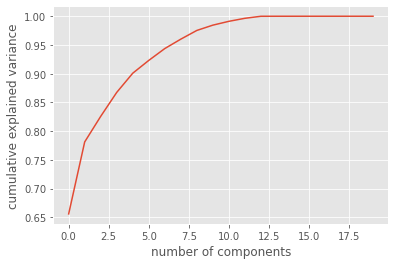

In [51]:
## Selecting the Compoments of PCA vasis the Variance via Scree Plot

plt.plot(np.cumsum(explained_variance))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
#NGOPC_SF_ALL_PE_CONTACT_TITAN_M_REQF_Num_scaled_pca

In [26]:
#Analysis: We shall choose the top 6 principal components.
#The top 6 principal components explain 96 % variance in the dataset. Beyond the top 6, the marginial gain in variance for adding each principal componenet is significantly reduced.
# Principal component analysis to take the 6 top components

i = 6
from sklearn.decomposition import PCA
pca = PCA(n_components = i)
NGOPC_SF_ALL_PE_CONTACT_TITAN_M_REQF_Num_scaled_pca = pca.fit_transform(NGOPC_SF_ALL_PE_CONTACT_TITAN_M_REQF_Num_scaled)
#X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print("Variation explained by each principal component")
list(explained_variance)

Variation explained by each principal component


[0.6557469837576454,
 0.12536371774359492,
 0.044562151215341746,
 0.04170871710858117,
 0.033406977474516264,
 0.022286314863404256]

In [27]:
## Drop dataframe due to RAM memory crunch

NGOPC_SF_ALL_PE_CONTACT_TITAN_M_REQF_Num_scaled.drop(NGOPC_SF_ALL_PE_CONTACT_TITAN_M_REQF_Num_scaled.index, inplace =True)

### Customer Segmentation

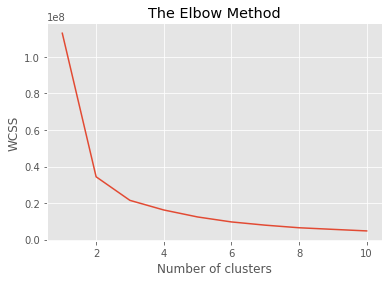

In [37]:
# Elbow method used for customer segmentation based on the top 3 principal componenets
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(NGOPC_SF_ALL_PE_CONTACT_TITAN_M_REQF_Num_scaled_pca)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

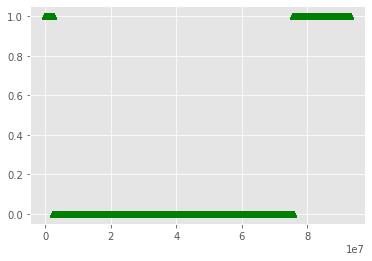

In [28]:
#Performing K-mean Clustering 
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(NGOPC_SF_ALL_PE_CONTACT_TITAN_M_REQF_Num_scaled_pca)
plt.plot(y_kmeans, 'g^')
plt.show()

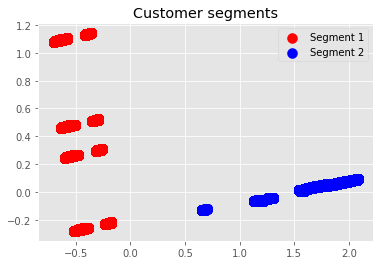

In [46]:
# Visualising the clusters
plt.scatter(NGOPC_SF_ALL_PE_CONTACT_TITAN_M_REQF_Num_scaled_pca[y_kmeans == 0, 0], NGOPC_SF_ALL_PE_CONTACT_TITAN_M_REQF_Num_scaled_pca[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Segment 1')
plt.scatter(NGOPC_SF_ALL_PE_CONTACT_TITAN_M_REQF_Num_scaled_pca[y_kmeans == 1, 0], NGOPC_SF_ALL_PE_CONTACT_TITAN_M_REQF_Num_scaled_pca[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Segment 2')
#plt.scatter(NGOPC_SF_ALL_PE_CONTACT_TITAN_M_REQF_Num_scaled_pca[y_kmeans == 2, 0], NGOPC_SF_ALL_PE_CONTACT_TITAN_M_REQF_Num_scaled_pca[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Segment 3')
#plt.scatter(NGOPC_SF_ALL_PE_CONTACT_TITAN_M_REQF_Num_scaled_pca[y_kmeans == 3, 0], NGOPC_SF_ALL_PE_CONTACT_TITAN_M_REQF_Num_scaled_pca[y_kmeans == 3, 1], s = 100, c = 'purple', label = 'Segment 4')
#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'yellow', label = 'Centroids')
plt.title('Customer segments')
plt.legend()
plt.show()

In [29]:
## Drop dataframe due to RAM memory crunch

np.delete(NGOPC_SF_ALL_PE_CONTACT_TITAN_M_REQF_Num_scaled_pca, np.s_[0:5], axis=1 )

array([[-0.0375968 ],
       [-0.02714098],
       [-0.02705477],
       ...,
       [-0.01991245],
       [-0.01913294],
       [-0.01994291]])

In [31]:
NGOPC_SF_ALL_PE_CONTACT_TITAN_M_REQF_Num_scaled_pca

array([[ 1.26930143, -0.04682972,  1.22130776,  0.17744856,  0.11748611,
        -0.0375968 ],
       [ 1.13495798, -0.06699127,  0.89768825,  0.65833558,  0.11876499,
        -0.02714098],
       [ 1.13452297, -0.06701542,  0.89660678,  0.6575241 ,  0.11902222,
        -0.02705477],
       ...,
       [ 0.66685719, -0.12887371,  0.94785955,  0.60916432,  0.35122868,
        -0.01991245],
       [ 0.65726329, -0.13011095,  0.92128919,  0.63722252,  0.35270912,
        -0.01913294],
       [ 0.66699706, -0.12886684,  0.94822174,  0.60946193,  0.35114016,
        -0.01994291]])

In [32]:
# Find the Clusters for obervations given in Dataset
NGOPC_SF_ALL_PE_CONTACT_TITAN_M_REQF_master['Cluster'] = y_kmeans
NGOPC_SF_ALL_PE_CONTACT_TITAN_M_REQF_master.head(50)

,QuotedRate,PercentageMarkup,TimeSpent_seconds,TimeSpent_minutes,FrequencyOfVisit,aza,IS_Converted,cust_type,org_code,CRMAccountID,SellingCurrency,BuyingCurrency,SellingAmount,BuyingAmount,ClientRate,BaseCurrency,BaseSellingAmount,BaseBuyingAmount,NetProfit,FinalProfit,Margin,Cluster
0,NaN,NaN,971,16,3396,Braintree,No,NaN,NaN,0010O00001qfkuvQAA,16,48,33128.85,44773.64,1.3515,16,33128.85,32793.07,335.78,335.78,1.01,1
1,NaN,NaN,971,16,3396,Braintree,No,NaN,NaN,0010O00001qfkuvQAA,16,14,3770.31,4340.38,1.1512,16,3770.31,3733.76,36.55,36.55,0.97,1
2,NaN,NaN,971,16,3396,Braintree,No,NaN,NaN,0010O00001qfkuvQAA,16,14,2877.51,3312.59,1.1512,16,2877.51,2848.66,28.85,28.85,1.00,1
3,NaN,NaN,971,16,3396,Braintree,No,NaN,NaN,0010O00001qfkuvQAA,16,14,4723.84,5438.08,1.1512,16,4723.84,4677.60,46.24,46.24,0.98,1
4,NaN,NaN,971,16,3396,Braintree,No,NaN,NaN,0010O00001qfkuvQAA,16,14,3464.11,3987.88,1.1512,16,3464.11,3430.41,33.70,33.70,0.97,1
5,NaN,NaN,971,16,3396,Braintree,No,NaN,NaN,0010O00001qfkuvQAA,16,48,42172.87,56996.64,1.3515,16,42172.87,41752.16,420.71,420.71,1.00,1
6,NaN,NaN,971,16,3396,Braintree,No,NaN,NaN,0010O00001qfkuvQAA,16,8,161161.00,201000.00,1.2472,16,161161.00,159569.83,1591.17,1591.17,0.99,1
7,NaN,NaN,971,16,3396,Braintree,No,NaN,NaN,0010O00001qfkuvQAA,16,16,29.33,29.33,1.0000,16,29.33,29.33,0.00,0.00,0.00,1
8,NaN,NaN,971,16,3396,Braintree,No,NaN,NaN,0010O00001qfkuvQAA,16,14,2824.03,3312.59,1.1730,16,2824.03,2794.65,29.38,29.38,1.04,1
9,NaN,NaN,971,16,3396,Braintree,No,NaN,NaN,0010O00001qfkuvQAA,16,14,826.14,969.06,1.1730,16,826.14,817.40,8.74,8.74,1.06,1


### Analysis of Clusters

In [33]:
## Filtering Data basis the  Customer Segments
# 1st Cluster
mask = NGOPC_SF_ALL_PE_CONTACT_TITAN_M_REQF_master["Cluster"] == 0
Customer_segments_1 = NGOPC_SF_ALL_PE_CONTACT_TITAN_M_REQF_master[mask]

# 2nd Cluster
mask = NGOPC_SF_ALL_PE_CONTACT_TITAN_M_REQF_master["Cluster"] == 1
Customer_segments_2 = NGOPC_SF_ALL_PE_CONTACT_TITAN_M_REQF_master[mask]


# Customer Segment Features

In [74]:
# City

print(Customer_segments_1.groupby(["aza"]).size().sort_values(ascending=False))
print(Customer_segments_2.groupby(["aza"]).size().sort_values(ascending=False))

aza
London    73228050
dtype: int64
aza
Kladno                7591676
London                6498648
Semily                2166216
Braintree             1161432
Jablonec nad Nisou    1083108
Witham                 387144
Lenzerwische           387144
Chelmsford             387144
Singapore               59520
Dorking                  1080
Westcott                  270
Ripley                    270
dtype: int64


<AxesSubplot:title={'center':'City_2'}>

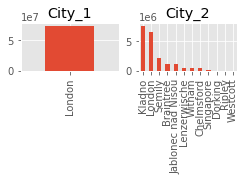

In [78]:
plt.subplot(431)
plt.title('City_1')
Output = None
Customer_segments_1["aza"].value_counts().plot(kind = "bar", x ='aza')
#CS1AZA.nlargest(5).plot(kind = "bar"
                        
plt.subplot(432)
plt.title('City_2')
Output = None
Customer_segments_2["aza"].value_counts().plot(kind = "bar", x ='aza')

In [69]:
NGOPC_SF_ALL_PE_CONTACT_TITAN_M_REQF_master.head()

,QuotedRate,PercentageMarkup,TimeSpent_seconds,TimeSpent_minutes,FrequencyOfVisit,aza,IS_Converted,cust_type,org_code,CRMAccountID,SellingCurrency,BuyingCurrency,SellingAmount,BuyingAmount,ClientRate,BaseCurrency,BaseSellingAmount,BaseBuyingAmount,NetProfit,FinalProfit,Margin,Cluster
0,NaN,NaN,971,16,3396,Braintree,No,NaN,NaN,0010O00001qfkuvQAA,16,48,33128.85,44773.64,1.3515,16,33128.85,32793.07,335.78,335.78,1.01,1
1,NaN,NaN,971,16,3396,Braintree,No,NaN,NaN,0010O00001qfkuvQAA,16,14,3770.31,4340.38,1.1512,16,3770.31,3733.76,36.55,36.55,0.97,1
2,NaN,NaN,971,16,3396,Braintree,No,NaN,NaN,0010O00001qfkuvQAA,16,14,2877.51,3312.59,1.1512,16,2877.51,2848.66,28.85,28.85,1.00,1
3,NaN,NaN,971,16,3396,Braintree,No,NaN,NaN,0010O00001qfkuvQAA,16,14,4723.84,5438.08,1.1512,16,4723.84,4677.60,46.24,46.24,0.98,1
4,NaN,NaN,971,16,3396,Braintree,No,NaN,NaN,0010O00001qfkuvQAA,16,14,3464.11,3987.88,1.1512,16,3464.11,3430.41,33.70,33.70,0.97,1


In [70]:
NGOPC_SF_ALL_PE_CONTACT_TITAN_M_REQF_master.shape

(92951702, 22)

In [71]:
#NGOPC_SF_ALL_PE_CONTACT_TITAN_M_REQF_master.to_csv('NGOPC_SF_ALL_PE_CONTACT_TITAN_M_REQF_master.csv')

In [36]:
# Buying Currency

print(Customer_segments_1.groupby(["BuyingCurrency"]).size().sort_values(ascending=False))
print(Customer_segments_2.groupby(["BuyingCurrency"]).size().sort_values(ascending=False))

BuyingCurrency
14    27121500
2     27121500
22    13560750
16     5424300
dtype: int64
BuyingCurrency
14    4401484
48    3954192
49    1777408
39    1777408
36    1333056
2     1333056
43     888704
31     888704
10     888704
1      888704
16     574480
34     444352
20     444352
8      129048
dtype: int64


<AxesSubplot:>

Text(0.5, 1.0, 'BC_1')

<AxesSubplot:title={'center':'BC_1'}, ylabel='Frequency'>

<AxesSubplot:>

Text(0.5, 1.0, 'BC_2')

<AxesSubplot:title={'center':'BC_2'}, ylabel='Frequency'>

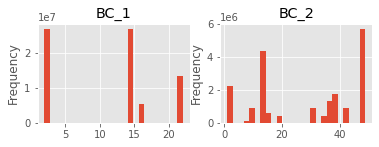

In [37]:
# Buying Currency
plt.subplot(221)
plt.title('BC_1')
#Output = None
Customer_segments_1["BuyingCurrency"].plot(kind = "hist", bins = 25)

plt.subplot(222)
plt.title('BC_2')
#Output = None
Customer_segments_2["BuyingCurrency"].plot(kind = "hist", bins = 25)

In [38]:
# Selling Currency

print(Customer_segments_1.groupby(["SellingCurrency"]).size().sort_values(ascending=False))
print(Customer_segments_2.groupby(["SellingCurrency"]).size().sort_values(ascending=False))

SellingCurrency
16    67803750
42     2712150
14     2712150
dtype: int64
SellingCurrency
48    16954816
16     2322864
39      444352
14        1620
dtype: int64


<AxesSubplot:>

Text(0.5, 1.0, 'BC_1')

<AxesSubplot:title={'center':'BC_1'}, ylabel='Frequency'>

<AxesSubplot:>

Text(0.5, 1.0, 'BC_2')

<AxesSubplot:title={'center':'BC_2'}, ylabel='Frequency'>

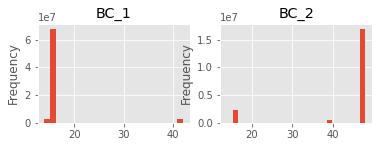

In [39]:
# Selling Currency
plt.subplot(221)
plt.title('BC_1')
#Output = None
Customer_segments_1["SellingCurrency"].plot(kind = "hist", bins = 25)

plt.subplot(222)
plt.title('BC_2')
#Output = None
Customer_segments_2["SellingCurrency"].plot(kind = "hist", bins = 25)

In [41]:
# Base Selling Amount

print(Customer_segments_1.groupby(["BaseSellingAmount"]).size().sort_values(ascending=False))
print(Customer_segments_2.groupby(["BaseSellingAmount"]).size().sort_values(ascending=False))

BaseSellingAmount
30.00     37970100
200.00     2712150
104.00     2712150
103.00     2712150
102.00     2712150
101.00     2712150
82.44      2712150
35.00      2712150
32.00      2712150
25.56      2712150
25.00      2712150
15.00      2712150
13.00      2712150
10.57      2712150
dtype: int64
BaseSellingAmount
3098.16      444352
1108.33      444352
250.90       444352
2842.08      444352
99.13        444352
188.04       444352
2601.04      444352
2486.46      444352
1809.67      444352
1793.33      444352
1725.91      444352
1565.61      444352
1059.14      444352
3176.54      444352
965.91       444352
943.50       444352
593.09       444352
478.35       444352
431.48       444352
429.93       444352
427.09       444352
374.06       444352
326.37       444352
319.16       444352
3146.71      444352
293.97       444352
4797.56      444352
6336.78      444352
5493.86      444352
5253.08      444352
4681.28      444352
6607.21      444352
4434.10      444352
3855.22      444352
6807.

<AxesSubplot:>

Text(0.5, 1.0, 'BS_1')

<AxesSubplot:title={'center':'BS_1'}, ylabel='Frequency'>

<AxesSubplot:>

Text(0.5, 1.0, 'BS_2')

<AxesSubplot:title={'center':'BS_2'}, ylabel='Frequency'>

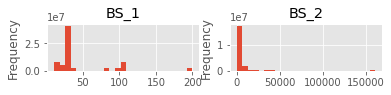

In [42]:
# Base Selling Amount
plt.subplot(421)
plt.title('BS_1')
#Output = None
Customer_segments_1["BaseSellingAmount"].plot(kind = "hist", bins = 25)

plt.subplot(422)
plt.title('BS_2')
#Output = None
Customer_segments_2["BaseSellingAmount"].plot(kind = "hist", bins = 25)

In [53]:
# Base buying Amount

print(Customer_segments_1.groupby(["BaseBuyingAmount"]).size().sort_values(ascending=False))
print(Customer_segments_2.groupby(["BaseBuyingAmount"]).size().sort_values(ascending=False))

BaseBuyingAmount
28.95     24409350
28.85     10848600
192.32     2712150
86.78      2712150
85.85      2712150
84.90      2712150
83.95      2712150
79.27      2712150
33.65      2712150
30.77      2712150
28.94      2712150
25.00      2712150
24.66      2712150
14.42      2712150
10.11      2712150
0.11       2712150
dtype: int64
BaseBuyingAmount
3042.09      444352
1088.78      444352
250.90       444352
97.39        444352
184.75       444352
2792.51      444352
2555.41      444352
2442.95      444352
1809.67      444352
1762.22      444352
1695.61      444352
1565.61      444352
1040.65      444352
3120.81      444352
948.46       444352
943.50       444352
582.86       444352
470.05       444352
423.96       444352
422.41       444352
419.61       444352
367.45       444352
326.37       444352
313.55       444352
3091.49      444352
288.82       444352
4713.60      444352
3787.70      444352
5397.67      444352
5164.24      444352
6336.78      444352
4599.35      444352
6491.50  

<AxesSubplot:>

Text(0.5, 1.0, 'BB_1')

<AxesSubplot:title={'center':'BB_1'}, ylabel='Frequency'>

<AxesSubplot:>

Text(0.5, 1.0, 'BB_2')

<AxesSubplot:title={'center':'BB_2'}, ylabel='Frequency'>

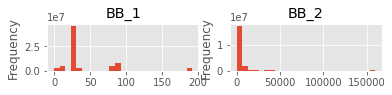

In [54]:
# Base Selling Amount
plt.subplot(421)
plt.title('BB_1')
#Output = None
Customer_segments_1["BaseBuyingAmount"].plot(kind = "hist", bins = 25)

plt.subplot(422)
plt.title('BB_2')
#Output = None
Customer_segments_2["BaseBuyingAmount"].plot(kind = "hist", bins = 25)

In [55]:
# Margin

print(Customer_segments_1.groupby(["Margin"]).size().sort_values(ascending=False))
print(Customer_segments_2.groupby(["Margin"]).size().sort_values(ascending=False))

Margin
3.50     24409350
3.83     10848600
3.84      5424300
99.15     2712150
16.88     2712150
16.76     2712150
16.65     2712150
16.56     2712150
4.35      2712150
3.87      2712150
3.86      2712150
3.85      2712150
3.53      2712150
3.52      2712150
0.00      2712150
dtype: int64
Margin
1.75    7553984
0.00    3753844
1.74    1777408
1.76    1777408
1.81     888704
1.00     645780
1.73     444352
1.72     444352
1.69     444352
1.77     444352
1.01     387684
1.04     258096
0.99     258096
0.97     258096
1.02     129048
0.98     129048
1.06     129048
dtype: int64


<AxesSubplot:>

Text(0.5, 1.0, 'Margin_1')

<AxesSubplot:title={'center':'Margin_1'}, ylabel='Frequency'>

<AxesSubplot:>

Text(0.5, 1.0, 'Margin_2')

<AxesSubplot:title={'center':'Margin_2'}, ylabel='Frequency'>

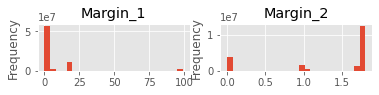

In [56]:
# Margin
plt.subplot(421)
plt.title('Margin_1')
#Output = None
Customer_segments_1["Margin"].plot(kind = "hist", bins = 25)

plt.subplot(422)
plt.title('Margin_2')
#Output = None
Customer_segments_2["Margin"].plot(kind = "hist", bins = 25)

In [59]:
# NetProfit

print(Customer_segments_1.groupby(["NetProfit"]).size().sort_values(ascending=False))
print(Customer_segments_2.groupby(["NetProfit"]).size().sort_values(ascending=False))

NetProfit
1.05     24409350
1.15     10848600
17.22     2712150
17.15     2712150
17.10     2712150
17.05     2712150
12.89     2712150
7.68      2712150
3.17      2712150
1.35      2712150
1.23      2712150
1.06      2712150
0.90      2712150
0.58      2712150
0.46      2712150
0.00      2712150
dtype: int64
NetProfit
0.00       3753844
7.52        888704
18.49       444352
17.45       444352
10.23       444352
30.30       444352
31.11       444352
8.30        444352
7.48        444352
6.61        444352
43.51       444352
45.63       444352
5.61        444352
49.57       444352
55.22       444352
55.73       444352
56.07       444352
5.15        444352
96.19       444352
1.50        444352
1.74        444352
148.40      444352
119.22      444352
3.29        444352
115.71      444352
88.84       444352
83.96       444352
81.93       444352
67.52       444352
63.48       444352
19.55       444352
2.35        129048
8.74        129048
0.94        129048
1591.17     129048
21.11       12

<AxesSubplot:>

Text(0.5, 1.0, 'NP_1')

<AxesSubplot:title={'center':'NP_1'}, ylabel='Frequency'>

<AxesSubplot:>

Text(0.5, 1.0, 'NF_2')

<AxesSubplot:title={'center':'NF_2'}, ylabel='Frequency'>

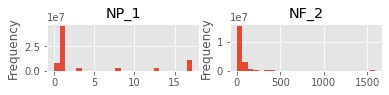

In [60]:
# Margin
plt.subplot(421)
plt.title('NP_1')
#Output = None
Customer_segments_1["NetProfit"].plot(kind = "hist", bins = 25)

plt.subplot(422)
plt.title('NF_2')
#Output = None
Customer_segments_2["NetProfit"].plot(kind = "hist", bins = 25)

## Applying 80/20 Rule (Pareto principle)


### Top 20% of customers driving 80% of TimeSpent


Unique customers:


5

<AxesSubplot:xlabel='CRMAccountID'>

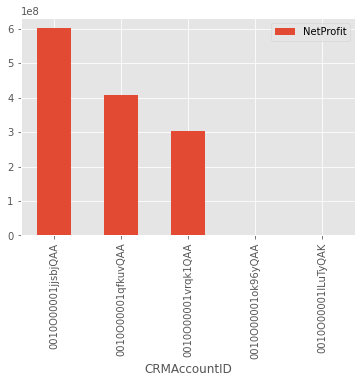

In [34]:
# Customer ID

print("Unique customers:")
NGOPC_SF_ALL_PE_CONTACT_TITAN_M_REQF_master["CRMAccountID"].nunique()

NGOPC_SF_ALL_PE_CONTACT_TITAN_M_REQF_master.groupby("CRMAccountID").agg({"NetProfit": "sum"}).sort_values("NetProfit", ascending = False).head(20).plot(kind = "bar")
                                
plt.show()

In [35]:
# Identifying the top 20 % customer segments driving 80 % NetProfit

h = NGOPC_SF_ALL_PE_CONTACT_TITAN_M_REQF_master["CRMAccountID"].nunique()
i = round(0.25*h)
print("# of customers in top 25% customer:", i, "out of", h)

j = NGOPC_SF_ALL_PE_CONTACT_TITAN_M_REQF_master.groupby("CRMAccountID").agg({"NetProfit": "sum"}).sort_values("NetProfit", ascending = False).head(i).sum()
k = NGOPC_SF_ALL_PE_CONTACT_TITAN_M_REQF_master["NetProfit"].sum()

l = j/k*100
print("Total Profit resulting from the top customer:", round(list(l)[0]), "%")

# of customers in top 25% customer: 1 out of 5
Total Profit resulting from the top customer: 46 %


### Top 20% of customers driving 80% of Margin


Unique customers:


5

<AxesSubplot:xlabel='CRMAccountID'>

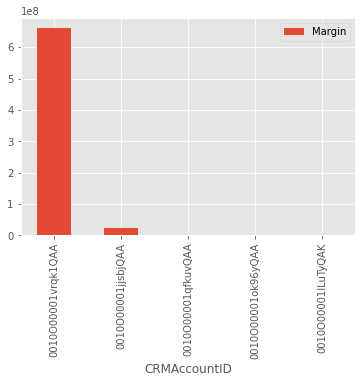

In [57]:

print("Unique customers:")
NGOPC_SF_ALL_PE_CONTACT_TITAN_M_REQF_master["CRMAccountID"].nunique()

NGOPC_SF_ALL_PE_CONTACT_TITAN_M_REQF_master.groupby("CRMAccountID").agg({"Margin": "sum"}).sort_values("Margin", ascending = False).head(20).plot(kind = "bar")
                                
plt.show()

In [58]:
# Identifying the top 25 % customer segments driving 80 % Margin

h = NGOPC_SF_ALL_PE_CONTACT_TITAN_M_REQF_master["CRMAccountID"].nunique()
i = round(0.25*h)
print("# of customers in top 25% customer:", i, "out of", h)

j = NGOPC_SF_ALL_PE_CONTACT_TITAN_M_REQF_master.groupby("CRMAccountID").agg({"Margin": "sum"}).sort_values("Margin", ascending = False).head(i).sum()
k = NGOPC_SF_ALL_PE_CONTACT_TITAN_M_REQF_master["Margin"].sum()

l = j/k*100
print("Total Profit resulting from the top customer:", round(list(l)[0]), "%")

# of customers in top 25% customer: 1 out of 5
Total Profit resulting from the top customer: 96 %


### Top 20 % geographic locations driving 80 % of NetProfit

#### Top 5 countries by NetProfit

Top 5 Cities by NetProfit:


<AxesSubplot:xlabel='aza'>

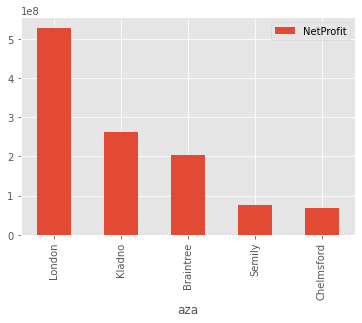

In [52]:
# Segmenting NetProfit by top 5 geographic location

print("Top 5 Cities by NetProfit:")
NGOPC_SF_ALL_PE_CONTACT_TITAN_M_REQF_master.groupby("aza").agg({"NetProfit": "sum"}).sort_values("NetProfit", ascending = False).head(5).plot(kind = "bar")
#dataset2.head(5).plot(kind = "bar")

Bottom 4 cities by NetProfit


<AxesSubplot:xlabel='aza'>

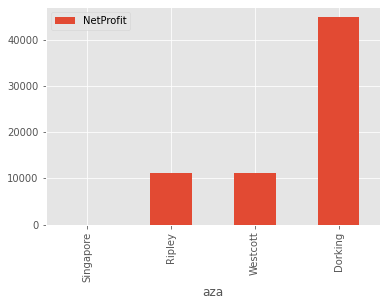

In [51]:
print("Bottom 4 cities by NetProfit")

NGOPC_SF_ALL_PE_CONTACT_TITAN_M_REQF_master.groupby("aza").agg({"NetProfit": "sum"}).sort_values("NetProfit", ascending = True).head(4).plot(kind = "bar")

In [61]:
pip freeze

Gkr-Message: 14:53:19.935: couldn't connect to dbus session bus: Failed to connect to socket /run/user/1001/bus: Connection refused
Keyring is skipped due to an exception: org.freedesktop.DBus.Error.NoServer: Failed to connect to socket /run/user/1001/bus: Connection refused
absl-py==0.8.1
alabaster==0.7.8
alembic==0.9.3.dev0
amqp==2.6.0
appdirs==1.4.3
APScheduler==3.6.0
apturl==0.5.2
asn1crypto==0.24.0
astor==0.8.1
astroid==2.3.3
astropy==4.0
astunparse==1.6.3
attrs==20.3.0
autoviz==0.0.81
Babel==2.4.0
backcall==0.2.0
beautifulsoup4==4.8.2
bert==2.2.0
bert-for-tf2==0.14.6
bert-tensorflow==1.0.1
billiard==3.6.3.0
bleach==3.1.0
blinker==1.4
blis==0.4.1
Boruta==0.3
boto3==1.10.34
botocore==1.13.34
branca==0.3.1
Brlapi==0.6.6
bs4==0.0.1
cached-property==1.5.1
cachetools==3.1.1
cassandra-driver==3.21.0
catalogue==0.0.8
catboost==0.20.2
catfish==1.4.4
celery==4.4.6
certifi==2018.1.18
cffi==1.12.3
chardet==3.0.4
Click==7.0
cloudpickle==1.2.2
colorama==0.3.7
colorlover==0.3.0
Command==0.1.0
c